<a href="https://colab.research.google.com/github/Soul2018/Mini-Project-Exploratory-Data-Analysis/blob/main/External_data_Local_Files%2C_Drive%2C_Sheets%2C_and_Cloud_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides recipes for loading and saving data from external sources.

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1         1  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2         1  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3         1  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4         2  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.10         1.0                  N           142            43   
1           0.20         1.0                  N           238           151   
2          14.70         1.0                  N           132           165   
3          10.60         1.0                  N           138           132   
4           4.94         1.0                  N            68            33   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


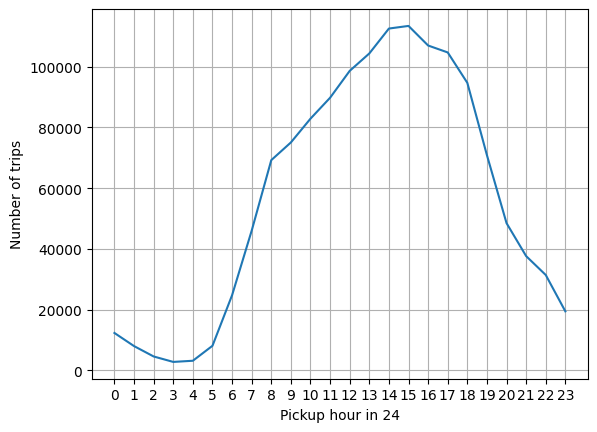

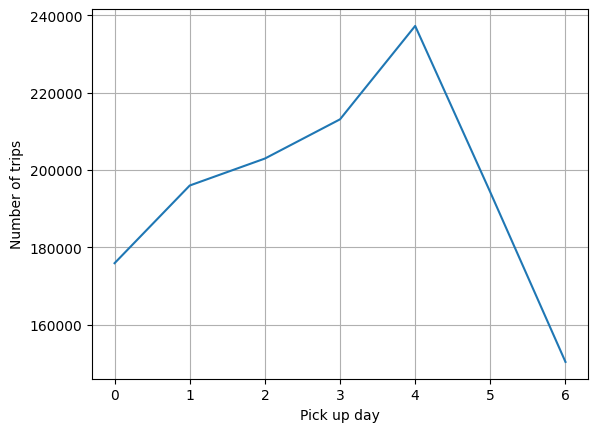

                          trip_distance  fare_amount  tip_amount  \
trip_distance                  1.000000     0.013399    0.002810   
fare_amount                    0.013399     1.000000    0.400433   
tip_amount                     0.002810     0.400433    1.000000   
total_amount                   0.012618     0.976886    0.549962   
trip_duration_in_minutes       0.000905     0.053093    0.018375   

                          total_amount  trip_duration_in_minutes  
trip_distance                 0.012618                  0.000905  
fare_amount                   0.976886                  0.053093  
tip_amount                    0.549962                  0.018375  
total_amount                  1.000000                  0.051741  
trip_duration_in_minutes      0.051741                  1.000000  


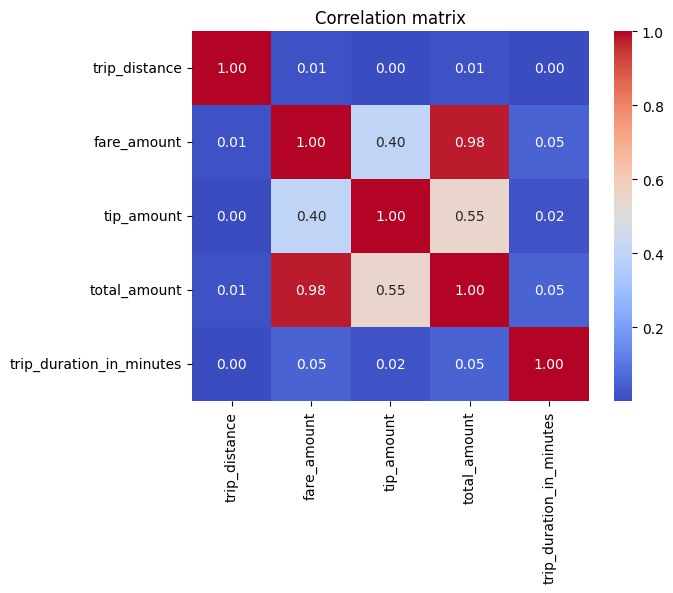

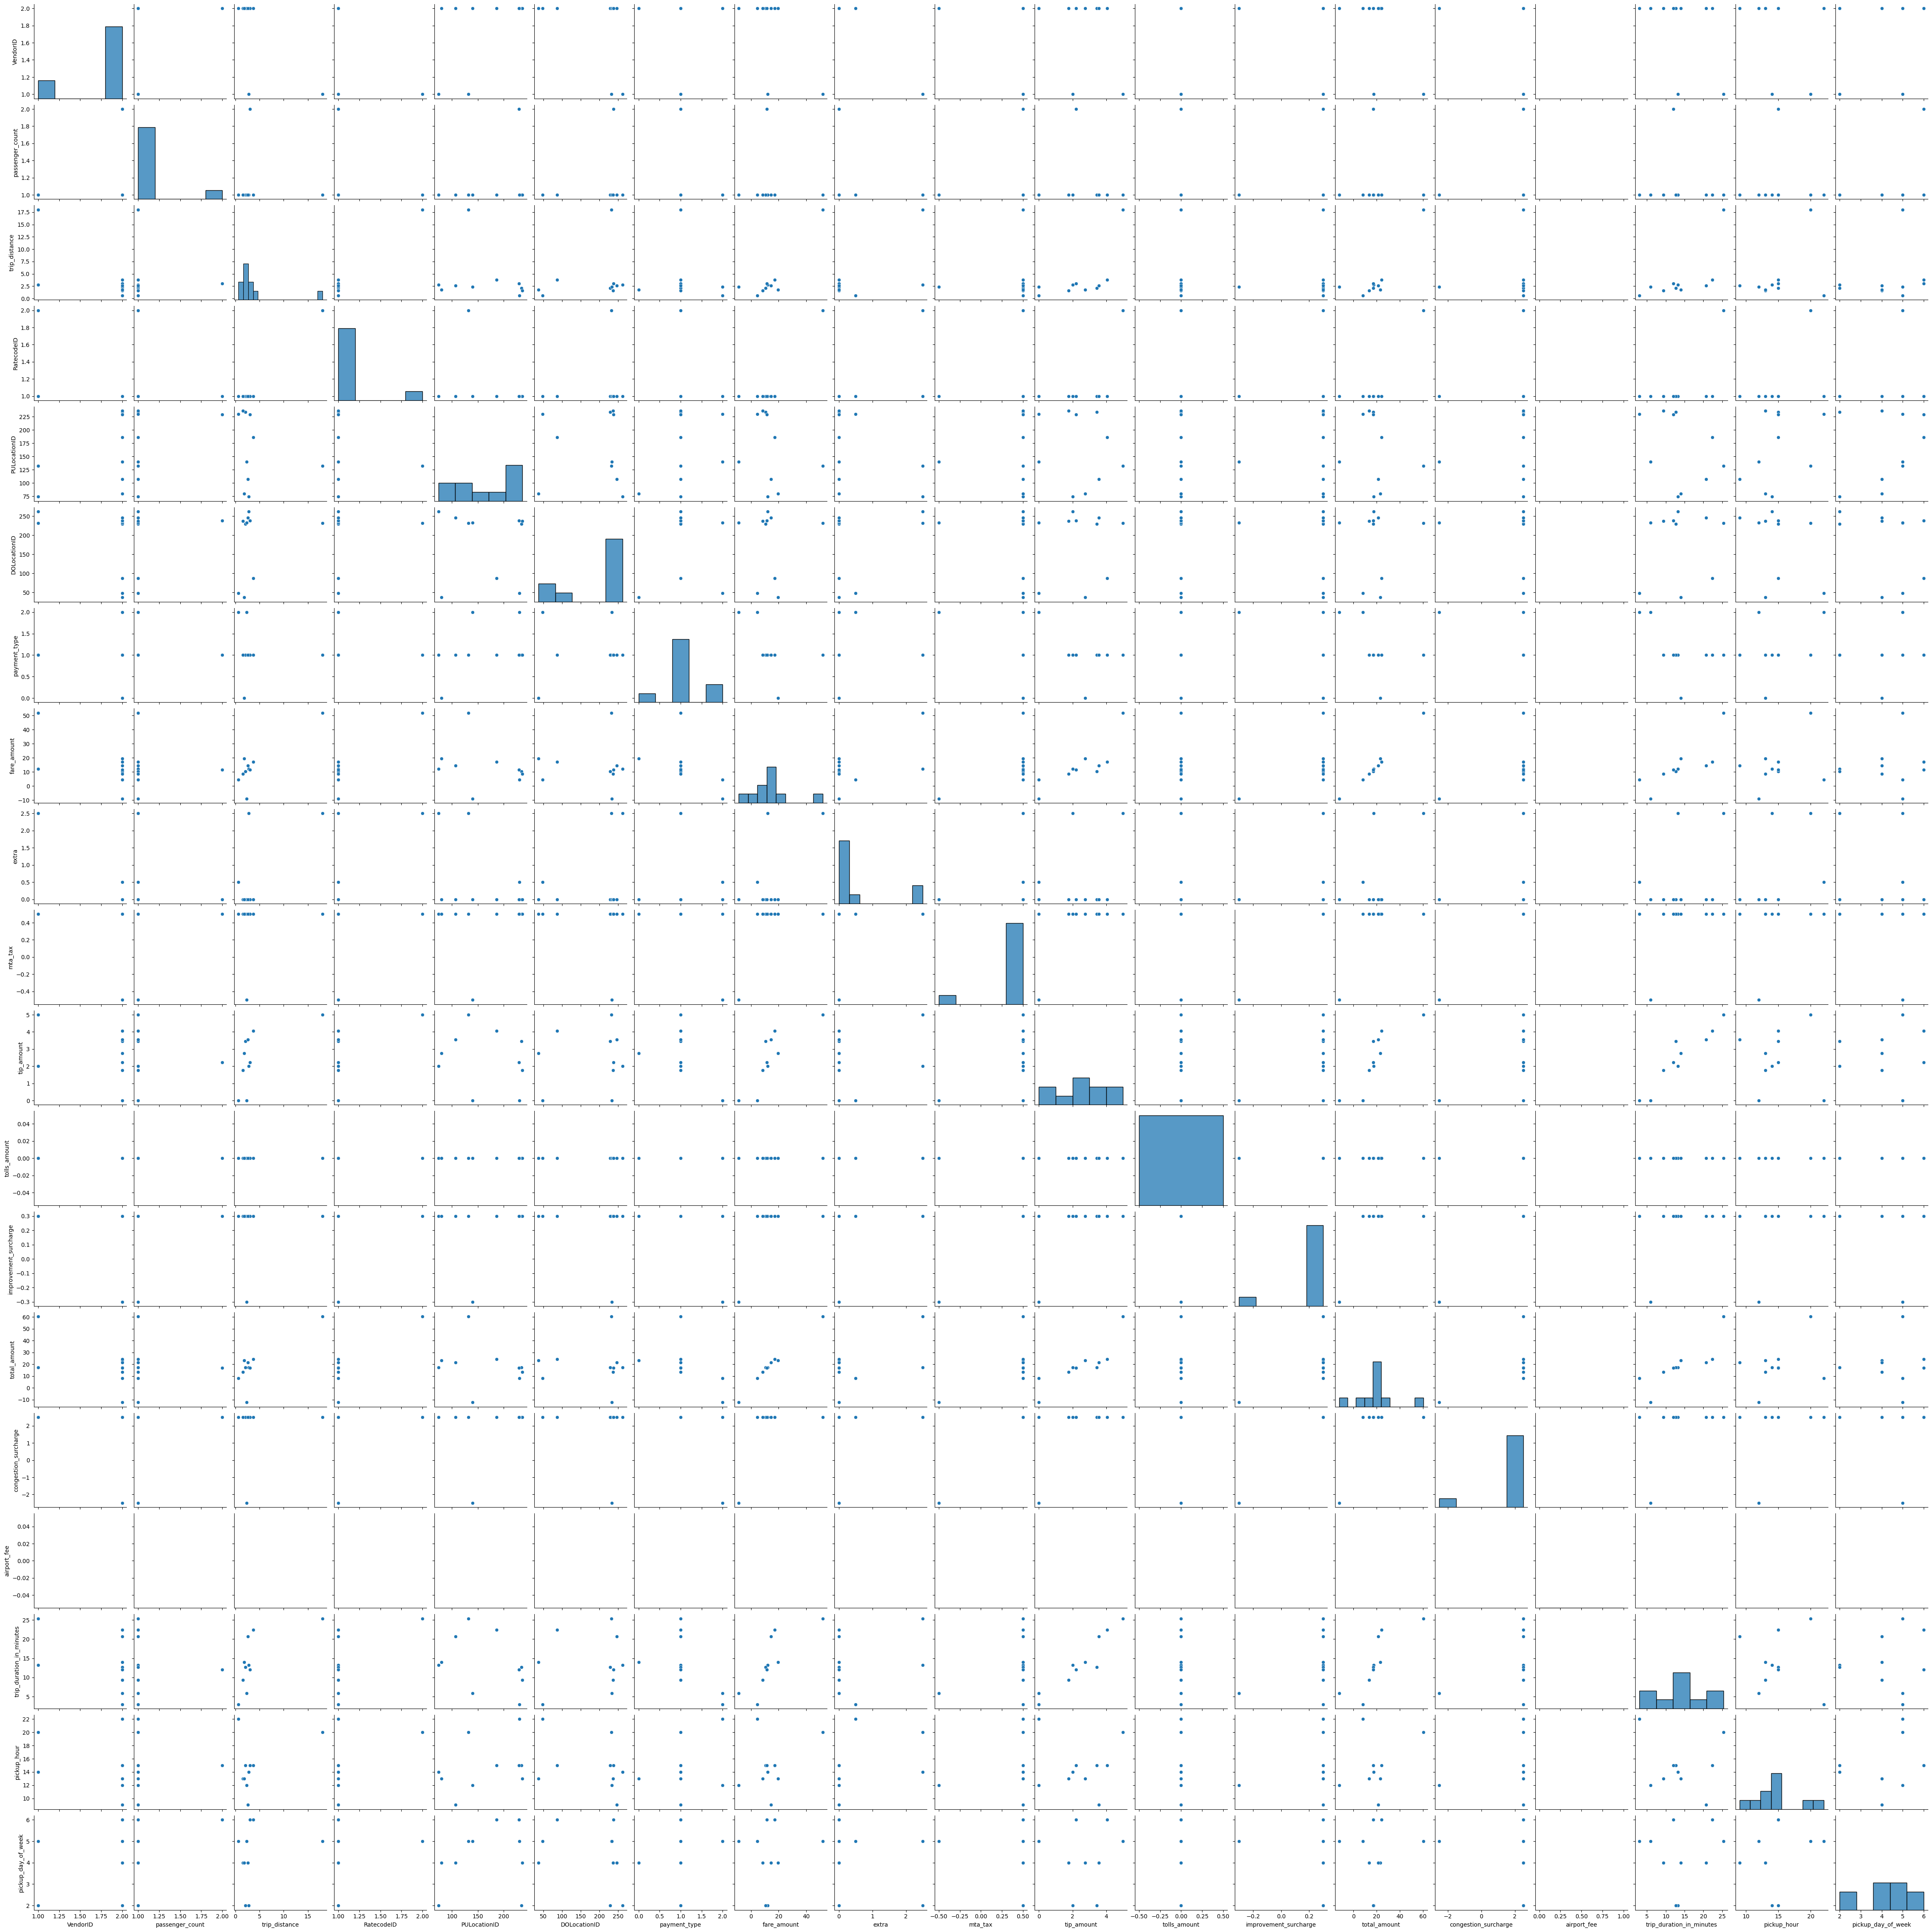

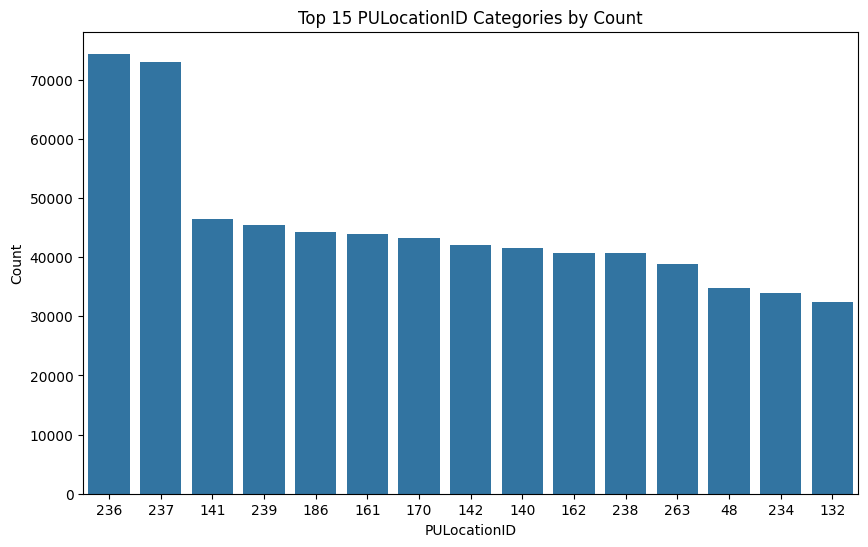

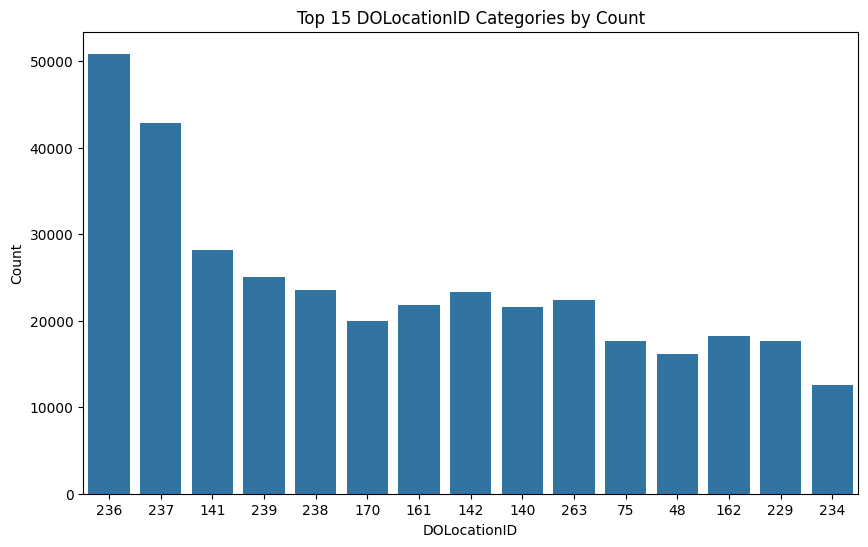

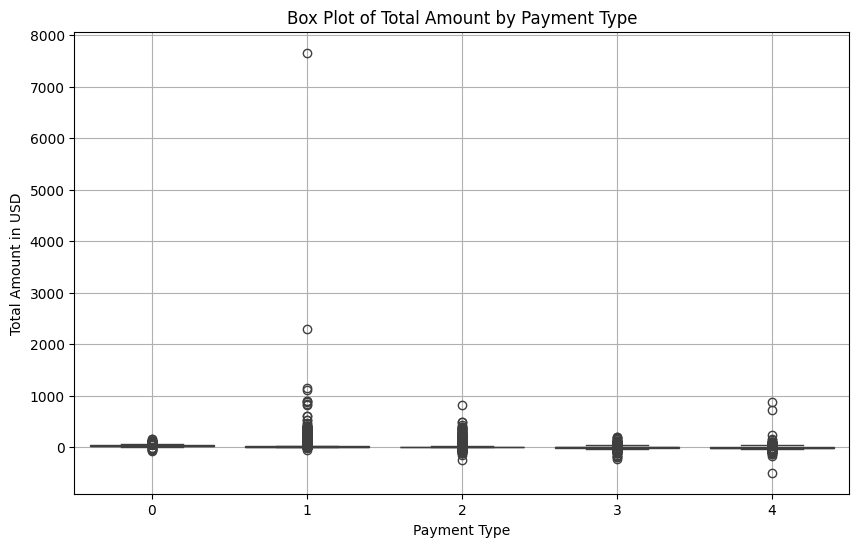

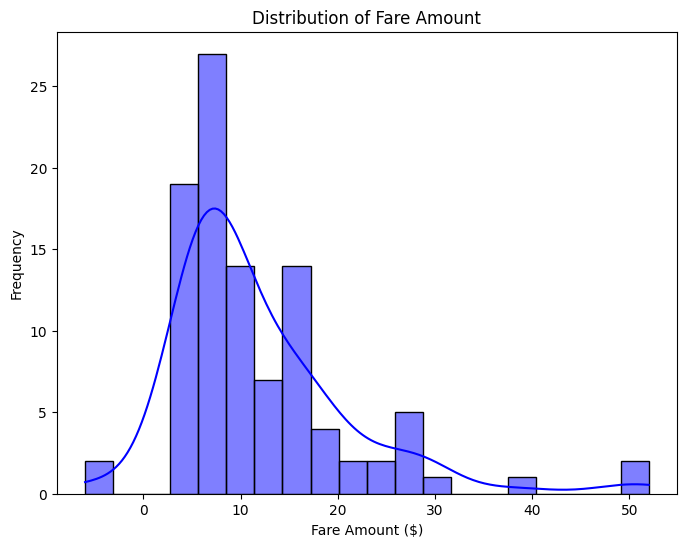

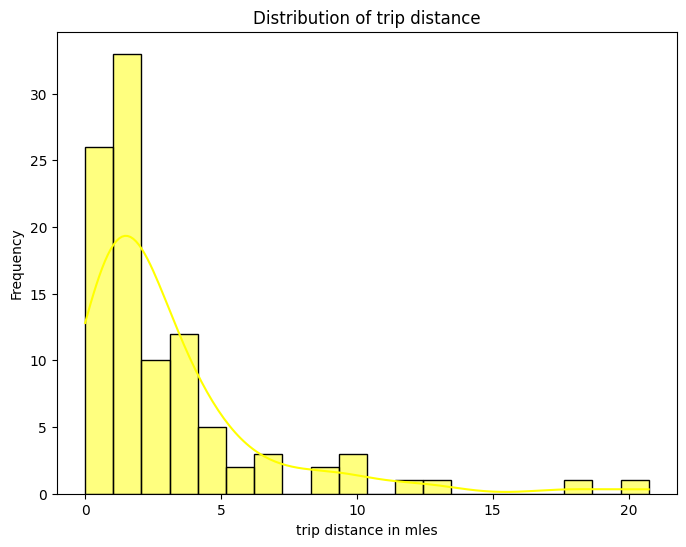

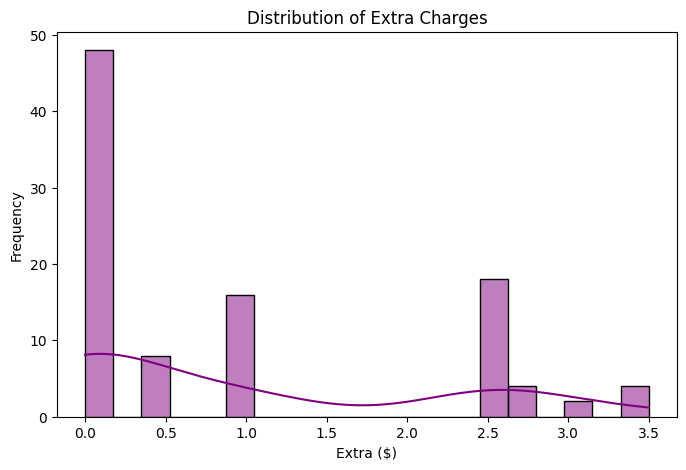

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/yellow_tripdata_2021-01.parquet')

# Display the first few rows of the dataset
print(df.head())

# Display the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull())

# Summary statistics of the dataset
print(df.describe())

# Drop rows with missing values
drop_rows = df.dropna(how='any')
print(drop_rows)

# Create a new column for trip duration in minutes
df['trip_duration_in_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df)

# Create new columns for pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
print(df)

# Create new columns for pickup day of week
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_of_week
print(df)

#Create a lineplot displaying the number of trips by pickup hour
trip_counts = df['pickup_hour'].value_counts().sort_index()
sns.lineplot(x=trip_counts.index, y=trip_counts.values)

plt.xlabel('Pickup hour in 24')
plt.ylabel('Number of trips')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()


# Create a lineplot displaying the number of trips by pickup day

trip_counts = df['pickup_day_of_week'].value_counts().sort_index()
sns.lineplot(x=trip_counts.index, y=trip_counts.values)

plt.xlabel('Pick up day')
plt.ylabel('Number of trips')
plt.xticks(range(0, 7))
plt.xticks()
plt.grid(True)
plt.show()

# Compute correlation matrix of numerical variables
specific_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_in_minutes']
specif_df = df[specific_columns]
corr_mat = specif_df.corr()
print(corr_mat)

# Create a heatmap of the correlation matrix

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# Which variables are strongly correlated?
# the fare_amount and total_amount are strongly correlated

# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

df_sample = df.sample(n=10)
sns.pairplot(df_sample)
plt.show

# Which variables appear to have a strong relationship?
# fare_amount and total amount
#Which variables seem to have no relationship?
# there is no relationship between airport_fee and any other variable

#Create a Seaborn countplot for PULocationID. Only plot the top 15 categories by value counts.
top_pickup_location = df['PULocationID'].value_counts().nlargest(15).index
df_top_pickup_location = df[df['PULocationID'].isin(top_pickup_location)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_pickup_location, x='PULocationID', order=top_pickup_location)
plt.title('Top 15 PULocationID Categories by Count')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.show()

#Create a Seaborn countplot for DOLocationID. Only plot the top 15 categories by value counts.
top_dropoff_location = df['DOLocationID'].value_counts().nlargest(15).index
df_top_dropoff_location = df[df['DOLocationID'].isin(top_dropoff_location)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_pickup_location, x='DOLocationID', order=top_dropoff_location)
plt.title('Top 15 DOLocationID Categories by Count')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.show()

#What's the most popular pick-up location?
# the most popular pick-up location is location ID 236

# Create a box plot of total amount by payment type. Do you see anything odd?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='total_amount')

plt.title('Box Plot of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount in USD')
plt.grid(True)
plt.show()

#Does anything look weird? Can you explain what's going on?
# there are weird payments happened till $8000, and I think these could be a data issue or error
# since there is no reason to pay thousands dollar for taxi trip within the city.
# we can conside that as an outlier with significant deviation in payment amount i.e $8000

# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot.
df_histo_sample = df.sample(n=100)
plt.figure(figsize=(8,6))
sns.histplot(df_histo_sample['fare_amount'], kde=True, bins=20, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Explore data distributions for 'trip_distance' using Seaborn's histplot.

plt.figure(figsize=(8,6))
sns.histplot(df_histo_sample['trip_distance'], kde=True, bins=20, color='yellow')
plt.title('Distribution of trip distance')
plt.xlabel('trip distance in mles')
plt.ylabel('Frequency')
plt.show()

# Explore data distributions for 'extra' using Seaborn's histplot.
plt.figure(figsize=(8, 5))
sns.histplot(df_histo_sample['extra'], kde=True, bins=20, color='green')
plt.title('Distribution of Extra Charges')
plt.xlabel('Extra ($)')
plt.ylabel('Frequency')
plt.show()
